<h1>Unscript Rookies Hackathon 2k22</h1>

<h2>Importing the Libraries</h2>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

<h2>Importing the Dataset</h2>

In [74]:
dataset = pd.read_csv("AIML Dataset.csv")

<h2>Data Analysis</h2>

<h3>Checking the types of data</h3>

In [75]:
dataset.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<h3>Checking for any null values</h3>

In [76]:
dataset.isnull().values.any()

False

There are no Null values in the Dataset.

<h3>Data Description</h3>

In [77]:
dataset.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [78]:
dataset.describe(include = 'object')

type     nameOrig     nameDest
count    6362620      6362620      6362620
unique         5      6353307      2722362
top     CASH_OUT  C1902386530  C1286084959
freq     2237500            3          113

In [79]:
profile = ProfileReport(dataset, title="Exploratory Data Analysis", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h3>Frequencies of Transaction types</h3>

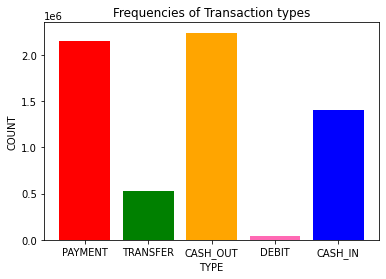

In [80]:
x_type = list(dataset.type.drop_duplicates().values)
y_type = [len(dataset.loc[(dataset.type == i)]) for i in x_type]
c = ["red", "green", "orange", "hotpink", "blue"]
plt.bar(x_type,y_type, color=c)
plt.title("Frequencies of Transaction types")
plt.xlabel("TYPE")
plt.ylabel("COUNT")
plt.show()

<h3>Checking for fraud transactions</h3>

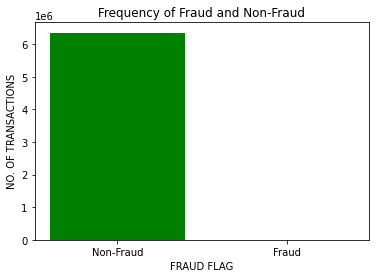

Fraud: 8213
Non-Fraud: 6354407


In [81]:
x_fraud = ["Non-Fraud", "Fraud"]
y_fraud = [len(dataset.loc[(dataset.isFraud == 0)]), len(dataset.loc[(dataset.isFraud == 1)])]
plt.bar(x_fraud, y_fraud, color=["green", "red"])
plt.title("Frequency of Fraud and Non-Fraud")
plt.xlabel("FRAUD FLAG")
plt.ylabel("NO. OF TRANSACTIONS")
plt.show()
print(f"Fraud: {y_fraud[1]}\nNon-Fraud: {y_fraud[0]}")

In [82]:
fraud_type = list(dataset.loc[dataset.isFraud == 1].type.drop_duplicates().values)
print(f"The Fraudulent transactions are of the type - {fraud_type}")

The Fraudulent transactions are of the type - ['TRANSFER', 'CASH_OUT']


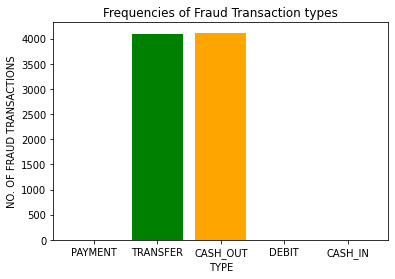

In [83]:
x_fraud_type = list(dataset.type.drop_duplicates().values)
y_fraud_type = [len(dataset.loc[(dataset.isFraud == 1) & (dataset.type == i)]) for i in x_fraud_type]
plt.bar(x_fraud_type, y_fraud_type, color=c)
plt.title("Frequencies of Fraud Transaction types")
plt.xlabel("TYPE")
plt.ylabel("NO. OF FRAUD TRANSACTIONS")
plt.show()

In [84]:
fraud_transfer = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'TRANSFER')]
fraud_cash_out = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_OUT')]
print(f"The number of fraudulent TRANSFERs = {len(fraud_transfer)}")
print(f"The number of fraudulent CASH_OUTs = {len(fraud_cash_out)}")

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


Therefore only CASH-OUT and TRANSFER transactions can be fraudulent.<br>
Also there is an almost equal likelihood that a fraudulent transaction can be CASH_OUT or TRANSFER.

<h4>Retaining only CASH-OUT and TRANSFER transactions</h4>

In [85]:
dataset = dataset.loc[dataset['type'].isin(['CASH_OUT', 'TRANSFER']),:]
print('The new data now has', len(data), 'transactions.')

The new data now has 2770409 transactions.


Therefore, we managed to reduce the data from over 60 lakhs transactions to ~28 lakhs transactions.

<h2>Training Classification Models</h2>

<h3>Data Preprocessing</h3>

In [86]:
dataset = dataset.loc[dataset['oldbalanceOrg'] > 0,:]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:,1] = le.fit_transform(dataset.iloc[:,1])
dataset = np.array(dataset)
dataset = np.delete(dataset, 3, axis=1)
dataset = np.delete(dataset, 5, axis=1)
dataset = pd.DataFrame(dataset)

In [87]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.astype('int')

<h3>Splitting the dataset into the Training set and Test set</h3>

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<h3>Feature Scaling</h3>

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2>Logistic Regression</h2>

<h3>Training the Logistic Regression model on the Training set</h3>

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

C:\Users\Sahil Raj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

<h3>Making the Confusion Matrix</h3>

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)

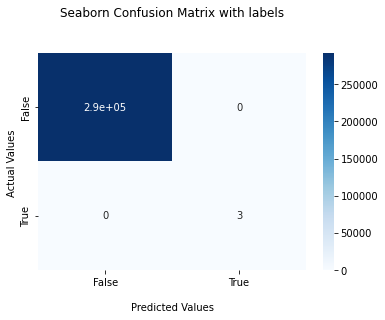

In [92]:
import seaborn as sns
ax = sns.heatmap(cm_lr, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [93]:
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT - RANDOM FOREST\n")
print(classification_report(y_test, y_pred_lr))

CLASSIFICATION REPORT - RANDOM FOREST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    292363
           1       1.00      1.00      1.00         3

    accuracy                           1.00    292366
   macro avg       1.00      1.00      1.00    292366
weighted avg       1.00      1.00      1.00    292366



<h2>Random Forest</h2>

<h3>Training the Random Forest model on the Training set</h3>

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

<h3>Making the Confusion Matrix</h3>

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

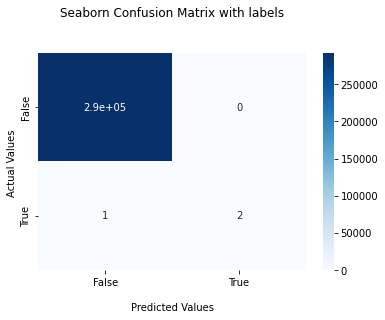

In [96]:
import seaborn as sns
ax = sns.heatmap(cm_rf, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [97]:
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT - RANDOM FOREST\n")
print(classification_report(y_test, y_pred_rf))

CLASSIFICATION REPORT - RANDOM FOREST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    292363
           1       1.00      0.67      0.80         3

    accuracy                           1.00    292366
   macro avg       1.00      0.83      0.90    292366
weighted avg       1.00      1.00      1.00    292366

